<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [101]:
import pandas as pd

Дані медичне страхування

In [102]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv')

df['sex'] = df['sex'].map({'male': 0, 'female':1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes':1})

df = df.drop(columns=['region'])

data = df[['age', 'bmi', 'expenses']]
df[['age', 'bmi', 'expenses']] = (data - data.min()) / (data.max() - data.min())

In [103]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,0.021739,1,0.320755,0,1,0.251611
1,0.000000,0,0.479784,1,0,0.009636
2,0.217391,0,0.458221,3,0,0.053115
3,0.326087,0,0.180593,0,0,0.333010
4,0.304348,0,0.347709,0,0,0.043816


Потрібно на основі інформації людини спрогнозувати розмір її страховки `expenses`

# Завдання 1
Створіть клас Dataset

In [104]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [105]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['expenses'])
y = df['expenses']

dataset = MyDataset(X, y)

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [106]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,  # датасет з даними
                        batch_size=batch_size,  # кількість даних в одному пакеті
                        shuffle=True,  # чи треба перемішувати дані
                        generator=torch.Generator(device=device)) # підключення до процесора)

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-5
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [107]:
from torch import nn


model = nn.Sequential(
    nn.Linear(5, 7),
    nn.SiLU(),
    nn.Linear(7, 4),
    nn.SiLU(),
    nn.Linear(4, 2),
    nn.SiLU(),
    nn.Linear(2, 1)
)

model

Sequential(
  (0): Linear(in_features=5, out_features=7, bias=True)
  (1): SiLU()
  (2): Linear(in_features=7, out_features=4, bias=True)
  (3): SiLU()
  (4): Linear(in_features=4, out_features=2, bias=True)
  (5): SiLU()
  (6): Linear(in_features=2, out_features=1, bias=True)
)

# Завдання 4
Визначте функцію втрат та оптимізатор

In [108]:
# Функція втрат середньоквадратичної помилки (MSE) для регресії
loss_fn = nn.MSELoss()

# Оптимізатор (SGD) для оновлення ваг моделі
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [109]:
import numpy as np

num_epochs = 11
losses = []

for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        # пряме пошерення
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        # Зворотнє поширення
        loss.backward() # рахуємо градієнти
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')

loss=0.13630535385825418
loss=0.09570040960203517
loss=0.0701187022707679
loss=0.05918049778450619
loss=0.04878115755590526
loss=0.04392688890749758
loss=0.04049543697725643
loss=0.04023349860852415
loss=0.03833966160362417
loss=0.03844956105405634
loss=0.038186914372173225


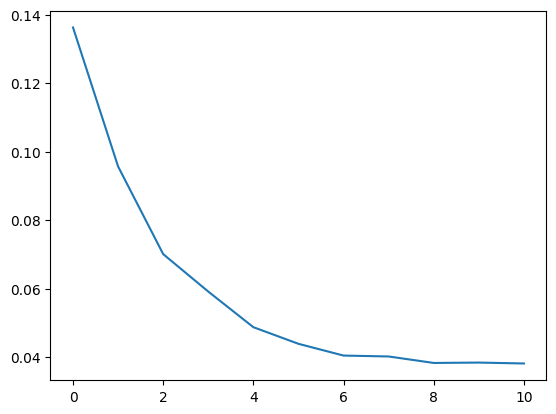

In [110]:
import matplotlib.pyplot as plt

plt.plot(losses)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [111]:
torch.save(model, 'model.pt')

In [112]:
load_model = torch.load('model.pt')

In [113]:
X.iloc[:1]

,age,sex,bmi,children,smoker
0,0.021739,1,0.320755,0,1


In [114]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.0217, 1.0000, 0.3208, 0.0000, 1.0000]])
torch.Size([1, 5])


In [115]:
load_model(X_data)

tensor([[0.1605]], grad_fn=<AddmmBackward0>)